In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [2]:
# Данные телеком компании
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# приводим TotalCharges из строкового типа в число
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# errors = 'coerce' все пропуски будут заменены на NAN - который имеет тип float

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


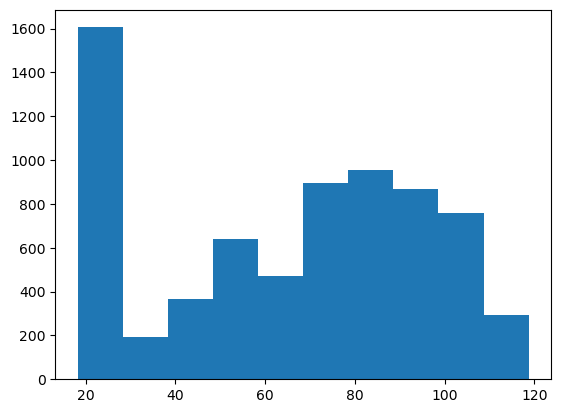

In [8]:
# посмотрим сколько клиенты платят за месяц за услуги

plt.hist(df['MonthlyCharges'])
plt.show()

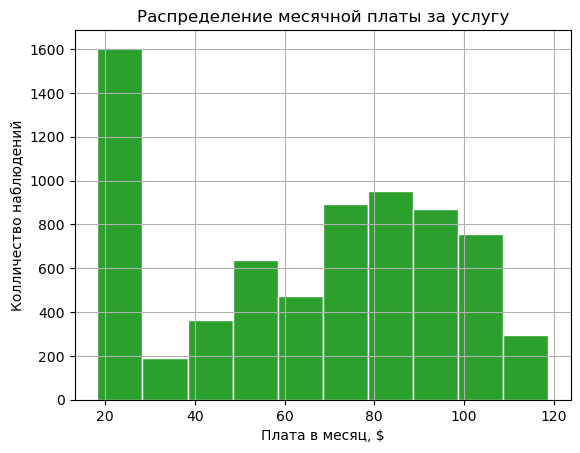

In [23]:
plt.hist(df['MonthlyCharges'], edgecolor= 'w')
plt.title('Распределение месячной платы за услугу')
plt.xlabel('Плата в месяц, $')
plt.ylabel('Колличество наблюдений')
plt.grid()
plt.show()

In [10]:
# мы видим что есть пик на 20 $ - много клиентов платят эту сумму, но основная масса распределена от 40 до 120

In [13]:
# построим то же самое при помощи Seaborn

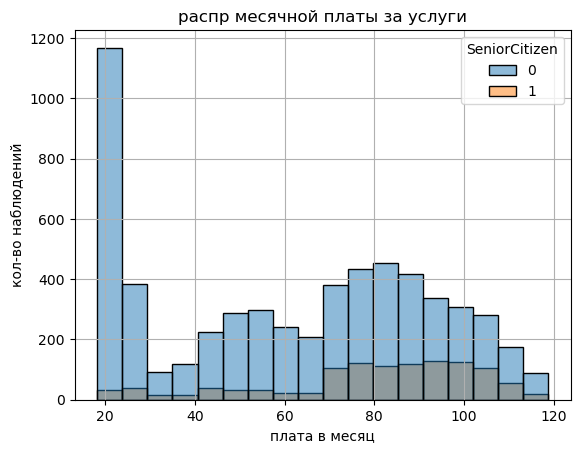

In [16]:
pic = sns.histplot(data=df,x='MonthlyCharges', hue= 'SeniorCitizen')
pic.set(xlabel= 'плата в месяц', ylabel='кол-во наблюдений', title = 'распр месячной платы за услуги')
plt.grid()
plt.show()

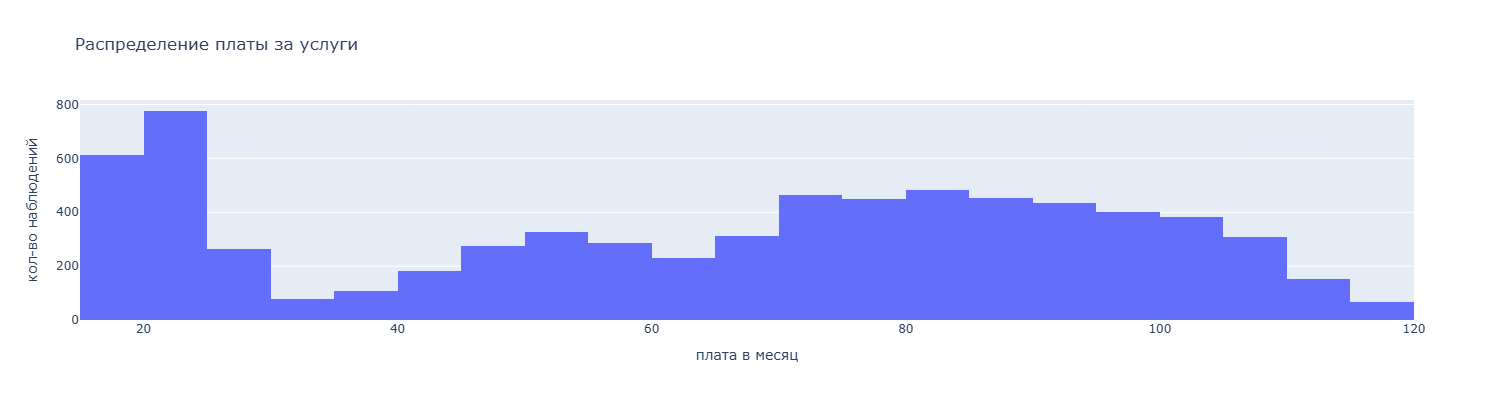

In [24]:
# построим то же график с использованием plotly
# nbinsx = 20 - параметр которым можно задать кол-во бакетов
hist = go.Histogram(x=df['MonthlyCharges'], nbinsx=50)
# создаем обьект Figure и в него передаем нашу гистограмму
fig = go.Figure(data=hist)

fig.update_layout(
    width=600,
    height=400,
    title = 'Распределение платы за услуги',
    xaxis_title='плата в месяц',
    yaxis_title='кол-во наблюдений'
)
fig.show()

